In [1]:
!pip install python-binance
!pip install pandas
!pip install matplotlib
!pip install talib-binary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 65 kB 2.2 MB/s 
     |████████████████████████████████| 112 kB 11.1 MB/s 
     |████████████████████████████████| 288 kB 50.1 MB/s 
     |████████████████████████████████| 749 kB 45.5 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2022.6.2
    Uninstalling regex-2022.6.2:
      Successfully uninstalled regex-2022.6.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


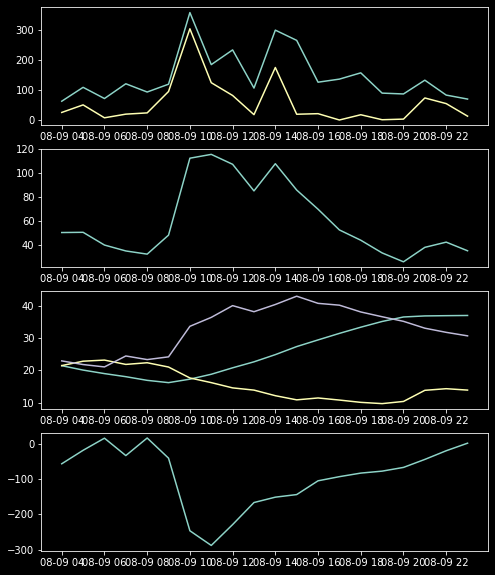

In [117]:
import pandas as pd 
import binance
import talib as ta
import matplotlib.pyplot as plt
client = binance.Client()
plt.style.use('dark_background')
last = float(client.futures_symbol_ticker(symbol= "BTCUSDT")["price"])
v1 = client.futures_klines(symbol= "BTCUSDT", interval = "1h", limit = 1200)
#ampl = float(v1[118][2]) - float (v1[118][3]) 
#chg = float(v1[118][1]) - float (v1[118][4])
v1d = pd.DataFrame(v1,  columns=['dateTime',
                                          'open',
                                          'high', 'low',
                                          'close', 'volume',
                                          'closeTime', 
                                          'quoteAssetVolume',
                                          'numberOfTrades', 
                                          'takerBuyBaseVol', 
                                          'takerBuyQuoteVol', 'ignore'])
v1d.open = pd.to_numeric(v1d["open"])
v1d.close = pd.to_numeric(v1d["close"])
v1d.high = pd.to_numeric(v1d["high"])
v1d.low = pd.to_numeric(v1d["low"])
v1d.volume = pd.to_numeric(v1d["volume"])
v1d.closeTime = pd.to_datetime(v1d["closeTime"], unit="ms")

pct = last/100


#real = PLUS_DI(high, low, close, timeperiod=14)

v1d["ampl"] = (v1d.high - v1d.low )#/pct
v1d["chg"] = abs(v1d.open - v1d.close)#/pct
v1d["pc7"] = v1d.chg.ewm(span = 7).mean()
v1d["plusd"] = ta.PLUS_DI(v1d.high, v1d.low, v1d.close, timeperiod=14)
v1d["minusd"] = ta.MINUS_DI(v1d.high, v1d.low, v1d.close, timeperiod=14)
v1d["adx"] = ta.ADX(v1d.high, v1d.low, v1d.close, timeperiod=14)
v1d["cci"] = ta.CCI(v1d.high, v1d.low, v1d.close, timeperiod=14)
v1d.pc7.tail(5)
fig, ax = plt.subplots(4,1, figsize = (8,10))
ax[0].plot(v1d.closeTime.tail(20), v1d.ampl.tail(20))
ax[0].plot(v1d.closeTime.tail(20), v1d.chg.tail(20))
ax[1].plot(v1d.closeTime.tail(20), v1d.pc7.tail(20))
ax[2].plot(v1d.closeTime.tail(20), v1d.adx.tail(20))
ax[2].plot(v1d.closeTime.tail(20), v1d.plusd.tail(20))
ax[2].plot(v1d.closeTime.tail(20), v1d.minusd.tail(20))
ax[3].plot(v1d.closeTime.tail(20), v1d.cci.tail(20))

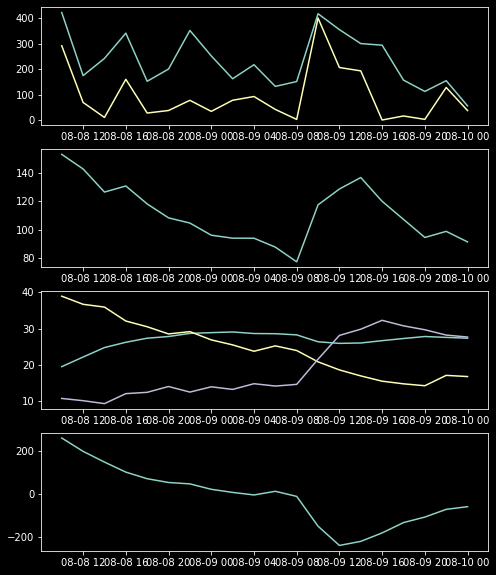

In [114]:
v1d.pc25.tail(5)

1195    120.119764
1196    107.304794
1197     94.429195
1198     98.775545
1199     91.278602
Name: pc25, dtype: float64